# Laboratory work #9 Support Vector Regression

In this work your goal is to get yourself familiar with Support Vector regression.

You can collaborate with your teammate to complete this laboratory work - in a team of 2 students.

## Task 1 Introduction
1. Create a team of two students and choose a dataset suitable for regression task. You can use www.kaggle.com or any similar resources of datasets. 
2. Describe you dataset - what kind of information does it contain, what are the features, what is the target value?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Breast_cancer_data.csv')
df.sample()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
235,14.03,21.25,89.79,603.4,0.0907,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [3]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [63]:
x = df.drop('diagnosis', axis=1).to_numpy()
y = df.diagnosis.to_numpy()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 5) (114, 5) (455,) (114,)


# Task 3 Support Vector Regression

Train SVR() model on your data. Use 'rbf', 'linear', 'poly' kernels.

In [64]:
from sklearn.svm import SVR

In [88]:
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e4)
svr_poly = SVR(kernel='poly', C=1e4, degree=2)
y_rbf = np.round(svr_rbf.fit(x_train, y_train).predict(x_test))
y_lin = np.round(svr_lin.fit(x_train, y_train).predict(x_test))
y_poly = np.round(svr_poly.fit(x_train, y_train).predict(x_test))

y_rbf_list = []
for i in y_rbf:
    if i > 1:
        y_rbf_list.append(1)
    elif i < 0:
        y_rbf_list.append(0)
    else:
        y_rbf_list.append(int(i))
y_rbf = y_rbf_list

y_lin_list = []
for i in y_lin:
    if i > 1:
        y_lin_list.append(1)
    elif i < 0:
        y_lin_list.append(0)
    else:
        y_lin_list.append(int(i))
y_lin = y_lin_list

y_poly_list = []
for i in y_poly:
    if i > 1:
        y_poly_list.append(1)
    elif i < 0:
        y_poly_list.append(0)
    else:
        y_poly_list.append(int(i))
y_poly = y_poly_list

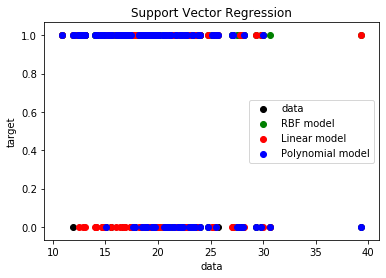

In [96]:
import pylab as pl
pl.scatter(x_test[:,1], y_test, c='k', label='data')
pl.scatter(x_test[:,1], y_rbf, c='g', label='RBF model')
pl.scatter(x_test[:,1], y_lin, c='r', label='Linear model')
pl.scatter(x_test[:,1], y_poly, c='b', label='Polynomial model')
pl.xlabel('data')
pl.ylabel('target')
pl.title('Support Vector Regression')
pl.legend()
pl.show()

# Task 4 Metrics

Create a method print_metrics(), that prints the following metrics MAE (mean absolute error), MSE (mean squared error), MAPE (mean absolute percentage error), r2_score.

In [2]:
from sklearn import metrics

In [3]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Task 5 Conclusion

Analyze the work that you have done and make a conclusion. Make a short report on your work. 